In [1]:
import os

In [2]:
from IPython.display import Image

In [3]:
import rpy2.robjects as robjects

In [4]:
import rpy2.robjects.lib.ggplot2 as ggplot2

/Users/danielemercatelli/opt/anaconda3/envs/bioinformatics_r/lib/python3.11/site-packages/rpy2/robjects/lib/ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.2
  warnings.warn(


In [5]:
from rpy2.robjects.functions import SignatureTranslatedFunction

In [6]:
import pandas as pd

In [7]:
import rpy2.robjects as ro

In [8]:
from rpy2.robjects import pandas2ri

In [9]:
from rpy2.robjects.conversion import localconverter

In [10]:
print(os.getcwd())

/Users/danielemercatelli/Documents/src


In [11]:
os.mkdir("data_files")

FileExistsError: [Errno 17] File exists: 'data_files'

In [12]:
import wget

In [13]:
site_url = 'http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20130502.phase3.sequence.index'

In [14]:
file_name = wget.download(site_url)

100% [....................................................] 67057948 / 67057948

In [15]:
print(file_name)

20130502.phase3.sequence.index


In [16]:
os.rename(file_name, "data_files/"+file_name)

In [17]:
read_delim = robjects.r('read.delim')

In [18]:
seq_data = read_delim("data_files/"+file_name, header=True, stringsAsFactors=False)

In [19]:
print('This dataframe has %d columns and %d rows' %(seq_data.ncol,seq_data.nrow))

This dataframe has 26 columns and 187720 rows


In [20]:
print(seq_data.colnames)

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     



In [21]:
my_cols = robjects.r.ncol(seq_data)

In [22]:
print(my_cols)

[1] 26



In [23]:
print(my_cols[0])

26


In [25]:
# Perform data cleanup

as_integer = robjects.r('as.integer') # convert a column into integers
match = robjects.r.match
my_col = match('READ_COUNT', seq_data.colnames[0]) # vector returned

In [26]:
robjects.r.assign('seq.data', seq_data) # create a variable in the R namespace called seq.data

FASTQ_FILE,MD5,RUN_ID,...,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
'data/NA1...,'3b092ef1...,'ERR000018',...,'9280498','334097928','high cov...
'data/NA1...,'fcb89b0a...,'ERR000019',,'9571982','344591352','high cov...
'data/NA1...,'dcd4ff7d...,'ERR000020',,'149044','5365584','high cov...
'data/NA1...,'fb5d7eb5...,'ERR000020',,'2057690','74076840','high cov...
...,...,...,,...,...,...
'data/HG0...,'25947403...,'SRR824935',,'2173448','165182048','exome'
'data/HG0...,'1176aaea...,'SRR824936',,'10250','779000','exome'
'data/HG0...,'4ae5b931...,'SRR824936',,'2403340','182653840','exome'
'data/HG0...,'f87ba955...,'SRR824936',,'2403340','182653840','exome'


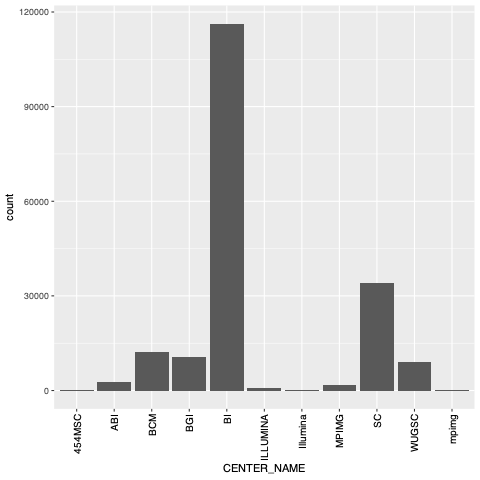

In [30]:
# Plot a histogram with the distribution of center names

from rpy2.robjects.functions import SignatureTranslatedFunction

ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme, 
                                            init_prm_translate = {'axis_text_x':'axis.text.x'})

bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x = 'CENTER_NAME') + ggplot2.theme(axis_text_x = ggplot2.element_text(angle=90, hjust=1))
robjects.r.png('out.png', type = 'cairo-png')
bar.plot()
dev_off = robjects.r('dev.off')
dev_off()

Image(filename='out.png')

In [35]:
# Scatter plot with subset of data of interest
robjects.r('yri_ceu <- seq.data[seq.data$POPULATION %in% c("YRI","CEU") & seq.data$BASE_COUNT < 2E9 & seq.data$READ_COUNT < 3E7,]')
yri_ceu = robjects.r('yri_ceu')

# Plot part
scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', \
y = 'READ_COUNT', shape = 'factor(POPULATION)', col = 'factor(ANALYSIS_GROUP)') + \
ggplot2.geom_point()

robjects.r.png('out2.png')
scatter.plot()
dev_off()


In [38]:
# Convert a R DataFrame to pandas

with localconverter(ro.default_converter + pandas2ri.converter):
    pd_yri_ceu = ro.conversion.rpy2py(yri_ceu)

del pd_yri_ceu['PAIRED_FASTQ']

with localconverter(ro.default_converter + pandas2ri.converter):
    no_paired = ro.conversion.py2rpy(pd_yri_ceu)
    
robjects.r.assign('no.paired', no_paired)
robjects.r("print(colnames(no.paired))")

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "WITHDRAWN"           "WITHDRAWN_DATE"     
[22] "COMMENT"             "READ_COUNT"          "BASE_COUNT"         
[25] "ANALYSIS_GROUP"     


'FASTQ_FI...,'MD5','RUN_ID',...,'READ_COU...,'BASE_COU...,'ANALYSIS...


In [40]:
# in jupyter
# %load_ext rpy2.ipython # load R magics
# %%R the entire cell should be interpreted by R
# %R -> some code only code after %R will be interpreted as R code

2
